# 数据分析

## 整合数据成一个DataFrame

In [2]:
import os
import pdb
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from pylab import mpl
from tqdm import tqdm
from sklearn import preprocessing
# from src.support_function import *

mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题


In [6]:
root_1 = '../Dataset/流量'
root_2 = '15个流量计水量数据'
file_list = os.listdir(os.path.join(root_1, root_2))

In [22]:
def str_to_timestamp(x):
    x = datetime.strptime(x, '%Y-%m-%d %H:%M')
    return int(datetime.timestamp(x))
def timestamp_to_datetime(x):
    return datetime.fromtimestamp(int(x))
def str_to_datetime(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
def normalize(df):
    # Create x, where x the 'scores' column's values as floats
    x = df.values.astype(float)

    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    x_scaled = min_max_scaler.fit_transform(x)

    # Run the normalizer on the dataframe
    df_normalized = pd.DataFrame(x_scaled, columns=df.columns, index=df.index)
    return df_normalized
def timestamp_to_str(x):
    x = datetime.fromtimestamp(x)
    return datetime.strftime(x, '%Y-%m-%d %H:%M:%S')
def timestamp_hour(x):
    return x.hour
def timestamp_year(x):
    return x.year
def timestamp_weekday(x):
    return x.weekday()
def timestamp_dayofyear(x):
    return x.dayofyear
def timestamp_weekofyear(x):
    return x.weekofyear
def timestamp_season(x):
    return x.quarter

In [14]:
file = file_list[0]
df_i = pd.read_excel(os.path.join(root_1, root_2, file))

In [15]:
df_i.head(3)
df_i.tail(3)

,时间,累计流量,用水量,反向流量
59471,2019-08-25 23:15,4992519.0,156.0,210415.0
59472,2019-08-25 23:30,4992675.0,115.0,210415.0
59473,2019-08-25 23:45,4992790.0,NaN,210415.0


In [16]:
file_list

['527中吴大道.xlsx',
 '552叶汤路.xlsx',
 '625 港区大道.xlsx',
 '637 新338省道.xlsx',
 '666 常戚路.xlsx',
 '723 青洋北路.xlsx',
 '725 东方东路.xlsx',
 '727 玉龙路.xlsx',
 '730 江春路.xlsx',
 '750 通江路.xlsx',
 '785 长江路龙城大道.xlsx',
 '794  龙江路.xlsx',
 '795 西赢里.xlsx',
 '800 健身路.xlsx',
 '811 延陵西路.xlsx']

In [17]:
start_time_str = '2017-01-01 00:00'
end_time_str = '2019-08-25 00:00'
start_timestamp = str_to_timestamp(start_time_str)
end_timestamp = str_to_timestamp(end_time_str)
time_step = 60*15
df = pd.DataFrame(index=list(range(start_timestamp, end_timestamp, time_step)))
for file in file_list:
    dfi = pd.read_excel(os.path.join(root_1, root_2, file))
    dfi['timestamp'] = dfi['时间'].apply(str_to_timestamp)
    dfi['用水量'] = dfi['累计流量'].diff()
    # pdb.set_trace()
    dfi.drop(columns=['时间','累计流量','反向流量'], inplace=True)
    dfi = dfi.set_index('timestamp')
    dfi = dfi.rename(columns={'用水量': file[0:-5]+'Q'})
    # pdb.set_trace()
    df = df.join(dfi)

In [24]:
df

,527中吴大道Q,552叶汤路Q,625 港区大道Q,637 新338省道Q,666 常戚路Q,723 青洋北路Q,725 东方东路Q,727 玉龙路Q,730 江春路Q,750 通江路Q,785 长江路龙城大道Q,794 龙江路Q,795 西赢里Q,800 健身路Q,811 延陵西路Q,datetime
datetime,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
2017-01-01 00:15:00,2.8,172.0,146.0,156.0,63.0,38.0,0.0,109.0,0.0,84.0,286.0,261.0,0.0,NaN,0.0,2017-01-01 00:15:00
2017-01-01 00:30:00,2.9,167.0,151.0,154.0,60.0,36.0,0.0,107.0,0.0,45.0,283.0,262.0,0.0,45.0,0.0,2017-01-01 00:30:00
2017-01-01 00:45:00,2.7,164.0,153.0,147.0,62.0,36.0,0.0,107.0,0.0,5.0,270.0,263.0,0.0,NaN,0.0,2017-01-01 00:45:00
2017-01-01 01:00:00,2.8,162.0,163.0,146.0,58.0,37.0,0.0,101.0,0.0,7.0,266.0,247.0,0.0,43.0,0.0,2017-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-24 22:45:00,206.0,300.0,203.0,255.0,128.0,29.0,0.0,223.0,0.0,779.0,526.0,441.0,0.0,NaN,1.0,2019-08-24 22:45:00
2019-08-24 23:00:00,148.0,269.0,197.0,248.0,118.0,36.0,0.0,196.0,0.0,920.0,477.0,401.0,0.0,93.0,0.0,2019-08-24 23:00:00
2019-08-24 23:15:00,151.0,259.0,190.0,240.0,108.0,32.0,0.0,185.0,0.0,924.0,455.0,386.0,1.0,NaN,1.0,2019-08-24 23:15:00


## 数据集已经建立'15流量_dataset.csv'

In [25]:
# df['datetime'] = df.index
# df['datetime'] = df['datetime'].apply(timestamp_to_datetime)
# df = df.set_index('datetime')
df.to_csv(os.path.join(root_1, '15流量_dataset.csv'))

## 清洗前的数据

In [29]:
df = pd.read_csv(os.path.join(root_1, '15流量_dataset.csv'), index_col=0)

In [32]:
df.columns

Index(['527中吴大道Q', '552叶汤路Q', '625 港区大道Q', '637 新338省道Q', '666 常戚路Q',
       '723 青洋北路Q', '725 东方东路Q', '727 玉龙路Q', '730 江春路Q', '750 通江路Q',
       '785 长江路龙城大道Q', '794  龙江路Q', '795 西赢里Q', '800 健身路Q', '811 延陵西路Q',
       'datetime.1'],
      dtype='object')

In [35]:
df.drop(columns='datetime.1', inplace=True)

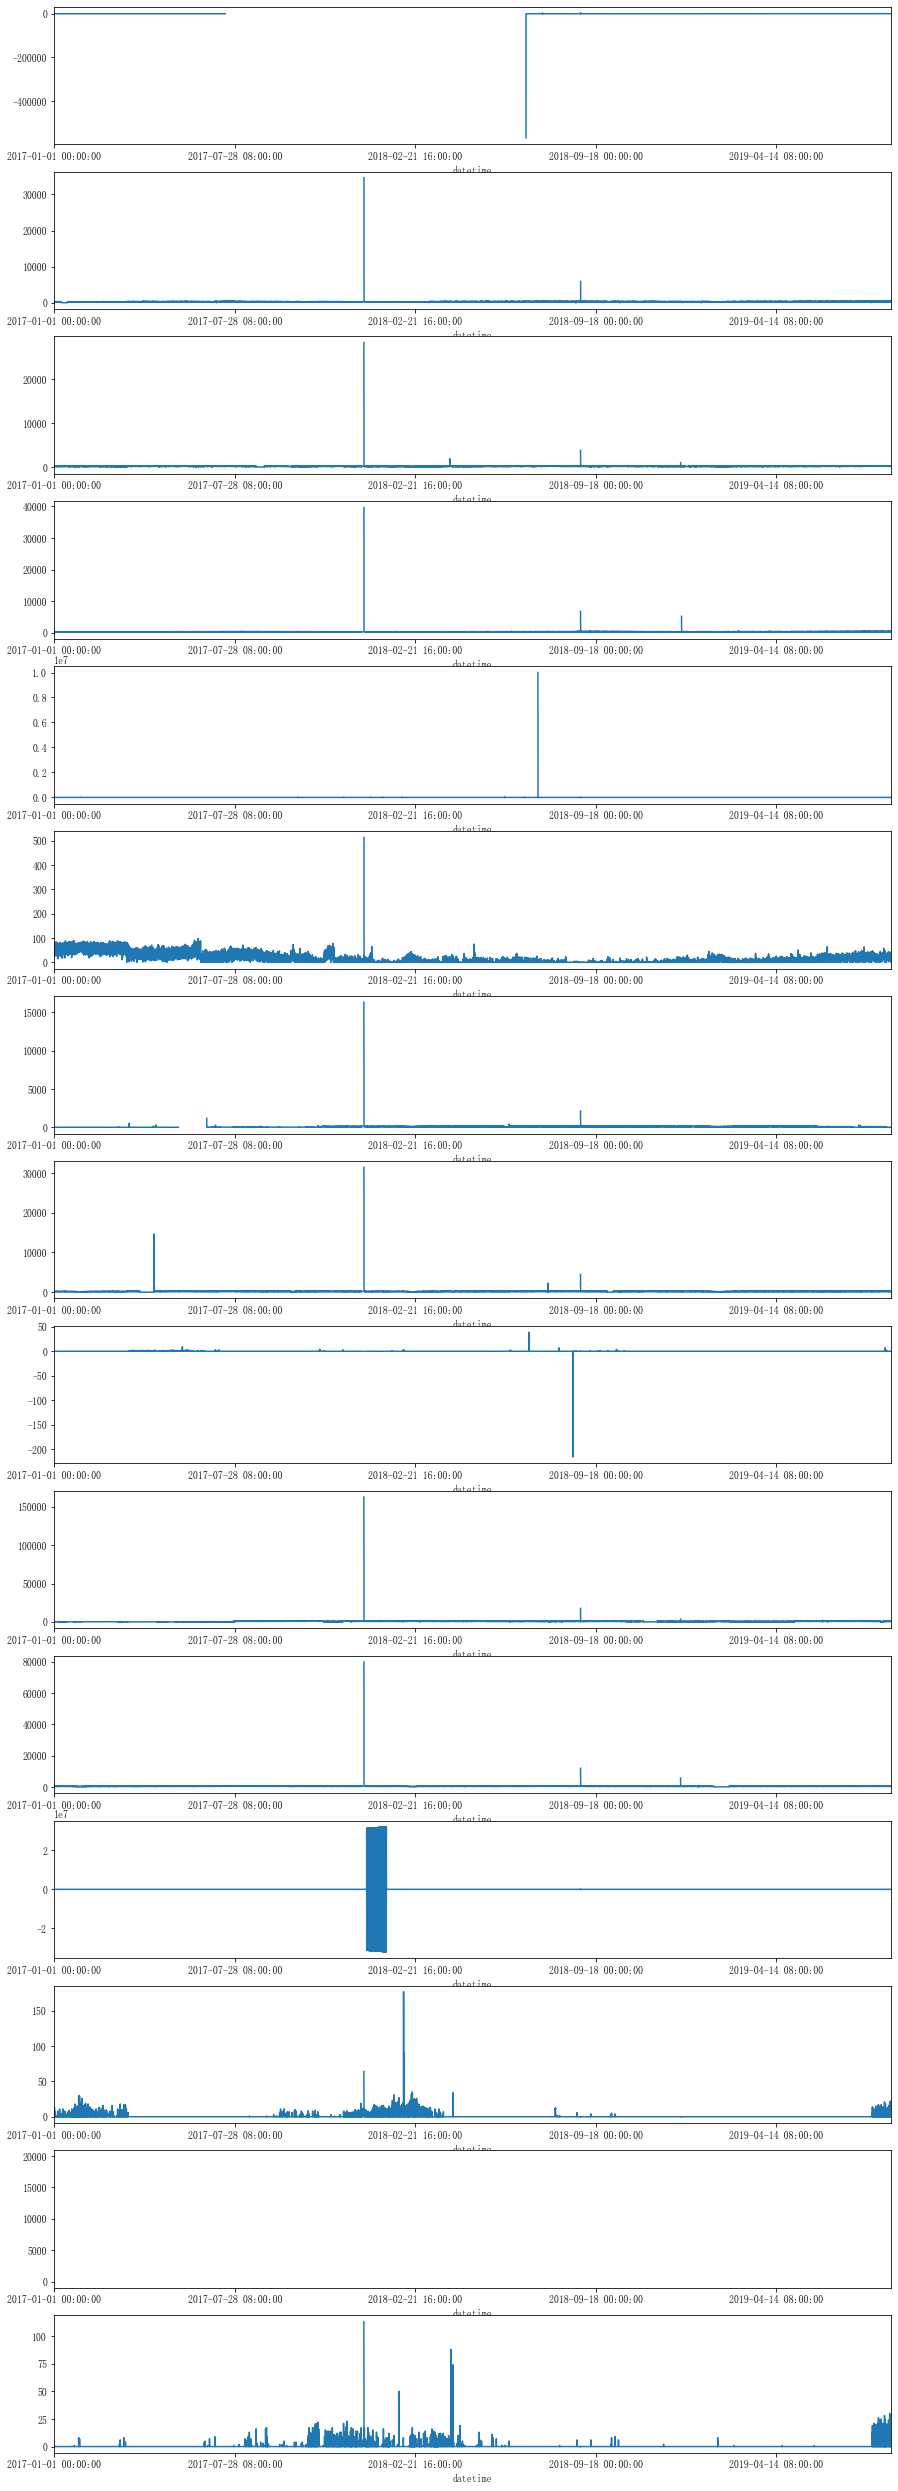

In [36]:
# 作图
column_num = df.shape[1]
plt.figure(figsize=(15, column_num * 3))
for index, column in enumerate(list(df.columns)):
    plt.subplot(column_num, 1, index+1)
    df[column].plot()
plt.show()

## 清洗后的数据

In [37]:
for column in list(df.columns):
    demand_min = df[column].quantile(0.05)
    demand_max = df[column].quantile(0.98)
    mask1 = df[column] < demand_min
    mask2 = df[column] > demand_max
    df[column][mask1 | mask2] = np.nan
df = df.interpolate()
df = df.interpolate(limit_direction='backward')

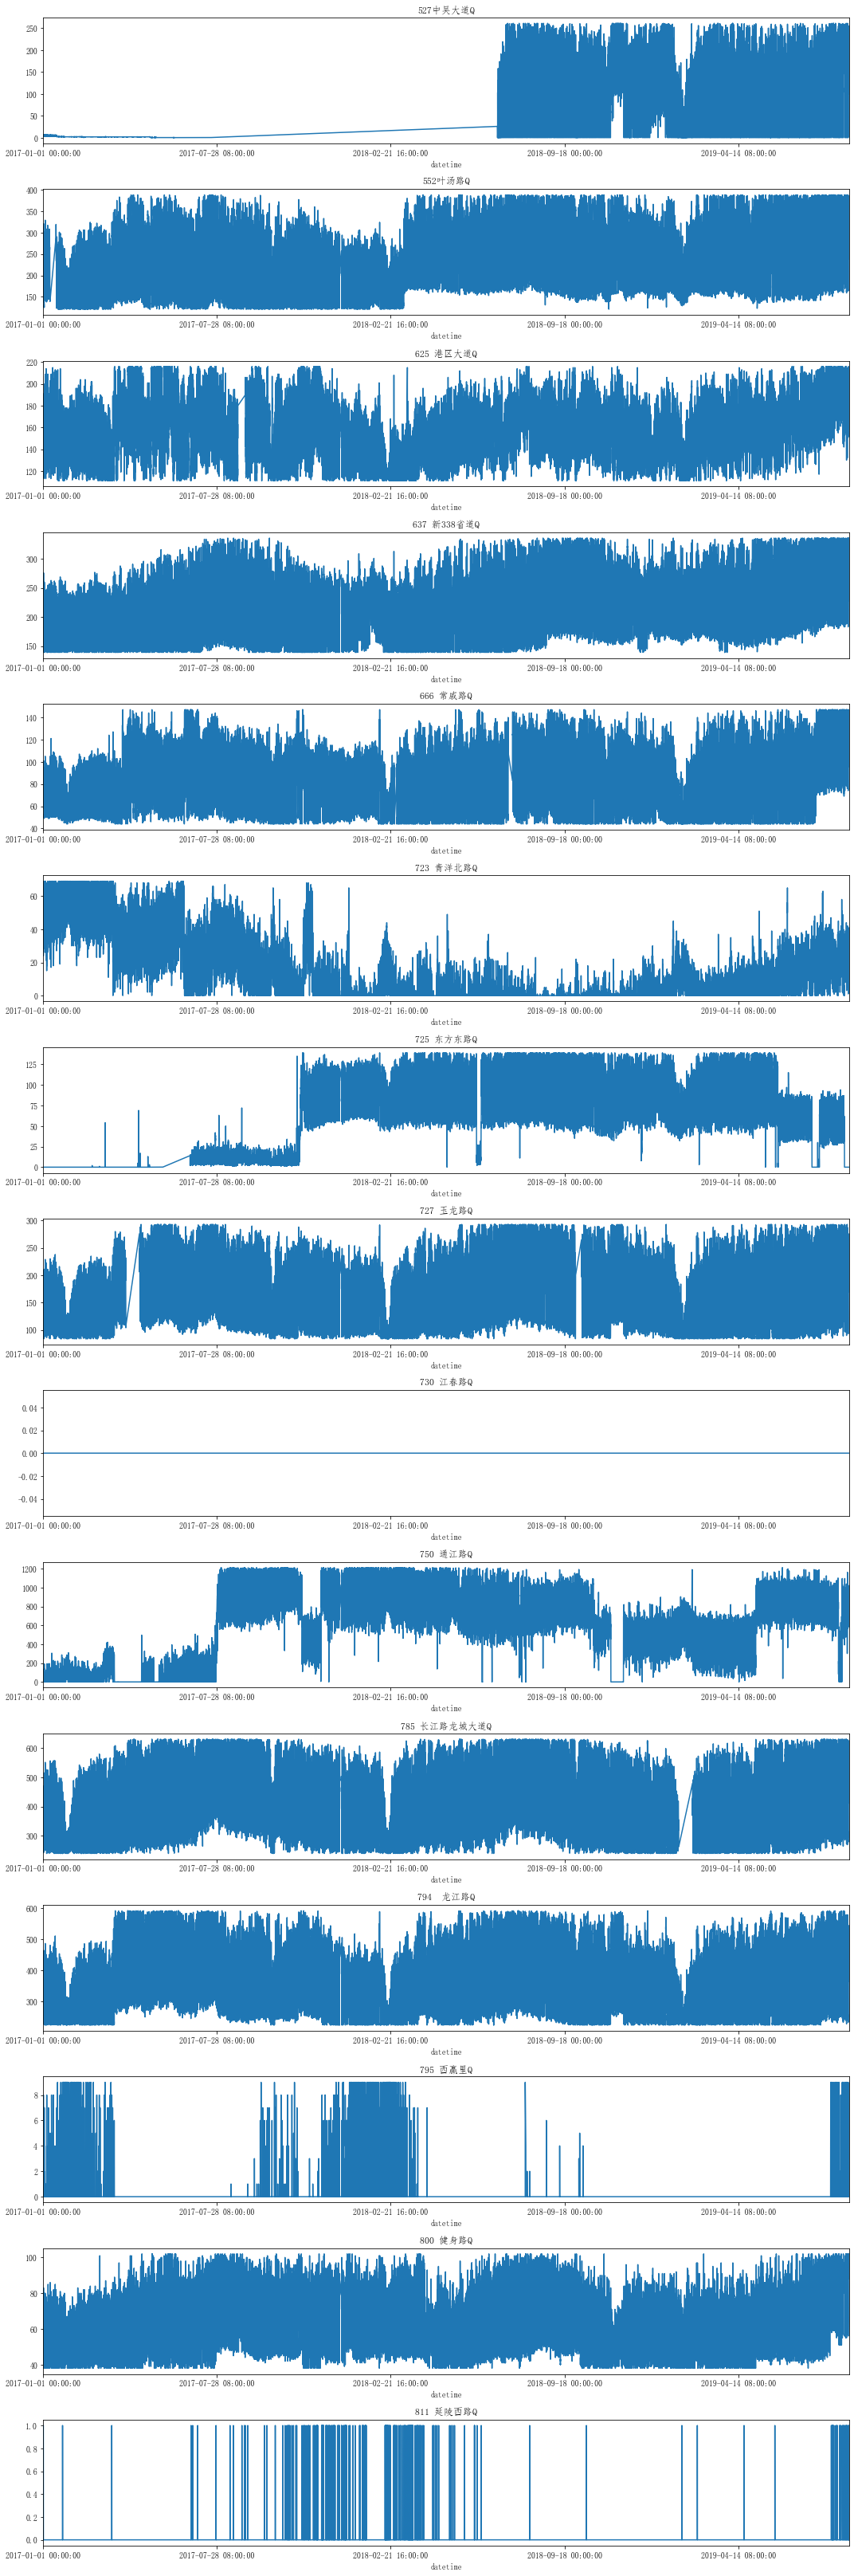

In [7]:
column_num = df.shape[1]
plt.figure(figsize=(15, column_num * 3), facecolor='w')
for index, column in enumerate(list(df.columns)):
    plt.subplot(column_num, 1, index+1)
    df[column].plot()
    plt.title(column)
plt.tight_layout()
plt.show()

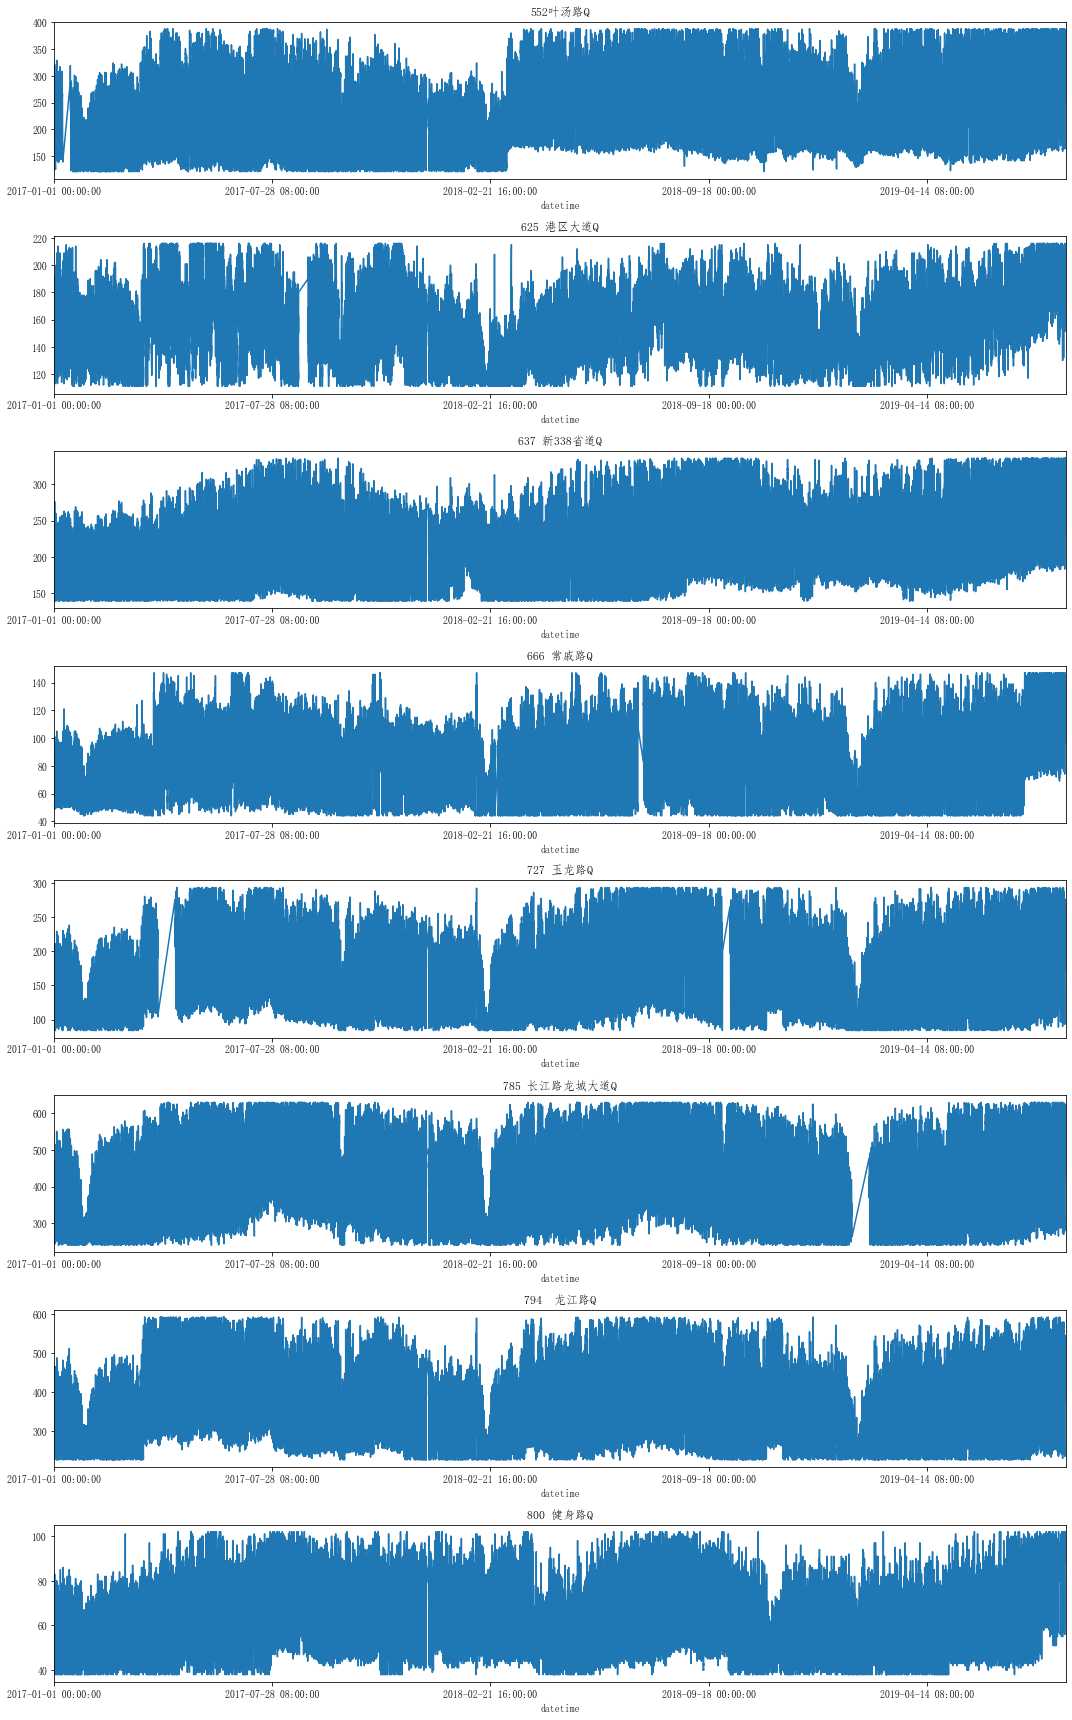

In [38]:
column_list_bad = ['527中吴大道Q', '723 青洋北路Q', '725 东方东路Q',
                   '730 江春路Q', '750 通江路Q', '795 西赢里Q', '811 延陵西路Q']
df2 = df.drop(columns=column_list_bad)
# df2 = normalize(df2)
        
column_num = df2.shape[1]
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.figure(figsize=(15, column_num * 3), facecolor='w')
for index, column in enumerate(list(df2.columns)):
    plt.subplot(column_num, 1, index+1)
    df2[column].plot()
    plt.title(column)
plt.tight_layout()
plt.show()

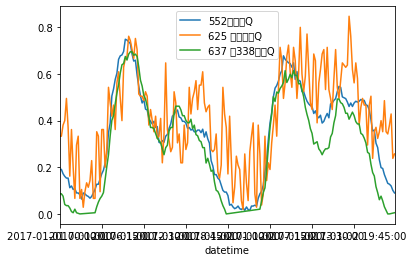

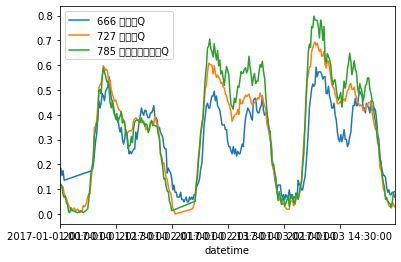

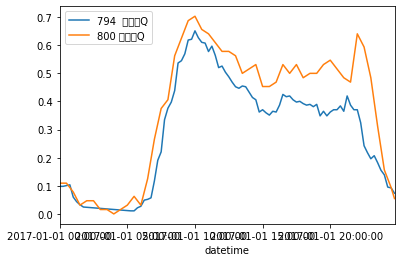

In [64]:
# plt.figure(figsize=(15, 4))
df2.iloc[0:200,0:3].plot()
df2.iloc[0:300,3:6].plot()
df2.iloc[0:100,6:8].plot()
# plt.show()

In [15]:
df2

,552叶汤路Q,625 港区大道Q,637 新338省道Q,666 常戚路Q,727 玉龙路Q,785 长江路龙城大道Q,794 龙江路Q,800 健身路Q
datetime,,,,,,,,
2017-01-01 00:00:00,0.191011,0.333333,0.086294,0.184466,0.119617,0.117949,0.098093,0.109375
2017-01-01 00:15:00,0.191011,0.333333,0.086294,0.184466,0.119617,0.117949,0.098093,0.109375
2017-01-01 00:30:00,0.172285,0.380952,0.076142,0.155340,0.110048,0.110256,0.100817,0.109375
2017-01-01 00:45:00,0.161049,0.400000,0.040609,0.174757,0.110048,0.076923,0.103542,0.093750
2017-01-01 01:00:00,0.153558,0.495238,0.035533,0.135922,0.081340,0.066667,0.059946,0.078125
2017-01-01 01:15:00,0.153558,0.371429,0.035533,0.137476,0.071770,0.071795,0.043597,0.054688
2017-01-01 01:30:00,0.112360,0.161905,0.025381,0.139029,0.062201,0.043590,0.032698,0.031250
2017-01-01 01:45:00,0.119850,0.361905,0.010152,0.140583,0.047847,0.038462,0.024523,0.039062
2017-01-01 02:00:00,0.104869,0.200000,0.005076,0.142136,0.033493,0.007692,0.023550,0.046875


In [39]:
df2.to_csv(os.path.join(root_1, '15流量_dataset_washed.csv'))

In [19]:
df2.corr()

,552叶汤路Q,625 港区大道Q,637 新338省道Q,666 常戚路Q,727 玉龙路Q,785 长江路龙城大道Q,794 龙江路Q,800 健身路Q
552叶汤路Q,1.000000,0.641492,0.899406,0.809844,0.895711,0.872030,0.888526,0.790024
625 港区大道Q,0.641492,1.000000,0.558233,0.617429,0.675065,0.665127,0.703001,0.586282
637 新338省道Q,0.899406,0.558233,1.000000,0.751942,0.803021,0.792070,0.780943,0.796530
666 常戚路Q,0.809844,0.617429,0.751942,1.000000,0.838053,0.832730,0.837084,0.780299
727 玉龙路Q,0.895711,0.675065,0.803021,0.838053,1.000000,0.934547,0.959889,0.833701
785 长江路龙城大道Q,0.872030,0.665127,0.792070,0.832730,0.934547,1.000000,0.947624,0.873610
794 龙江路Q,0.888526,0.703001,0.780943,0.837084,0.959889,0.947624,1.000000,0.852479
800 健身路Q,0.790024,0.586282,0.796530,0.780299,0.833701,0.873610,0.852479,1.000000


In [5]:
## Arima 预测
import pandas as pd
import os
df_arima = pd.read_csv(os.path.join(root_1, '15流量_dataset.csv'), index_col=0)
df_arima = df_arima['552叶汤路Q'].values
df_arima
start = 2000
plt.plot(df_arima[start: start+9200])
plt.show()

import pmdarima as pm
import numpy as np
from matplotlib import pyplot as plt
train = df_arima[start: start+3000]
test = df_arima[start+3000: start+3800]
arima = pm.auto_arima(train, error_action='ignore', trace=1,
                      seasonal=True, m=12)
pred = arima.predict(n_periods=test.shape[0])

plt.plot(pred)
plt.plot(test)
plt.legend(['pred', 'test'])
plt.show()
plt.plot(train)
plt.show()

array([ nan, 172., 167., ..., 259., 247., 239.])

## MA滑动平均

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [44]:
df_ma = pd.read_csv(os.path.join(root_1, '15流量_dataset_washed.csv'), index_col=0)
df_ma['datetime'] = df_ma.index
df_ma['datetime'] = df_ma['datetime'].apply(str_to_datetime)
df_ma = df_ma[['552叶汤路Q', 'datetime']]

In [45]:
df_ma['hour'] = df_ma['datetime'].apply(timestamp_hour)
df_ma['season'] = df_ma['datetime'].apply(timestamp_season)
df_ma['weekday'] = df_ma['datetime'].apply(timestamp_weekday)
# df_ma['weekofyear'] = df_ma['datetime'].apply(timestamp_hour)
# df_ma['week']
# df_ma['before'] = np.nan
df_ma['before'] = df_ma['552叶汤路Q'].shift(4)
df_ma['mean_before_hour'] = df_ma['before'].rolling(4).mean()
df_ma['qi_before_1_day'] = df_ma['552叶汤路Q'].shift(4*24)
df_ma['qi_mean_before_one_week'] = 0
for i in range(1,8):
    df_ma['qi_mean_before_one_week'] += df_ma['552叶汤路Q'].shift(4*24*i)/7
df_ma = df_ma.iloc[1000:]
# df_ma = df_ma.interpolate(limit_direction='backward')

In [61]:
x = df_ma.iloc[:,2:].values
y = df_ma['552叶汤路Q'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model_xgbt = GradientBoostingRegressor()
model_xgbt.fit(x_train, y_train)
y_pred_2 = model_xgbt.predict(x_test)
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)
y_pred_3 = model_rf.predict(x_test)

G:\Anaconda\envs\pytorch_env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


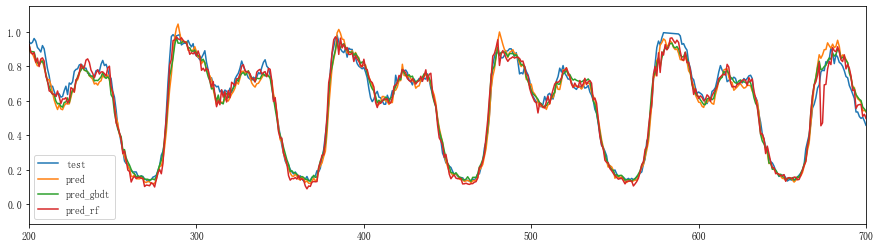

0.0029315453857117995 0.0025263338248189605 0.002483149724582227


In [64]:
plt.figure(figsize=(15,4))
plt.plot(y_test)
plt.plot(y_pred)
plt.plot(y_pred_2)
plt.plot(y_pred_3)
plt.xlim([200, 700])
plt.legend(['test', 'pred', 'pred_gbdt','pred_rf'])
plt.show()
print(
    metrics.mean_squared_error(y_test, y_pred),
    metrics.mean_squared_error(y_test, y_pred_2),
    metrics.mean_squared_error(y_test, y_pred_3)
)

In [59]:
model.coef_

array([-8.33331173e-04, -2.01696863e-03, -7.44563151e-04,  8.61607702e-01,
       -5.55217923e-01,  3.70154531e-01,  3.12071429e-01])

In [42]:
df_ma

,552叶汤路Q,datetime,hour,season,weekday,before,mean_before_hour,q_before_1_day,qi_before_1_day,qi_mean_before_one_week
datetime,,,,,,,,,,
2017-01-15 14:00:00,0.566848,2017-01-15 14:00:00,14,1,6,0.563608,0.562393,0.489093,0.489093,0.320021
2017-01-15 14:15:00,0.567658,2017-01-15 14:15:00,14,1,6,0.564418,0.563203,0.489903,0.489903,0.320180
2017-01-15 14:30:00,0.568468,2017-01-15 14:30:00,14,1,6,0.565228,0.564013,0.490713,0.490713,0.321409
2017-01-15 14:45:00,0.569278,2017-01-15 14:45:00,14,1,6,0.566038,0.564823,0.491523,0.491523,0.320498
2017-01-15 15:00:00,0.570087,2017-01-15 15:00:00,15,1,6,0.566848,0.565633,0.492333,0.492333,0.320123
2017-01-15 15:15:00,0.570897,2017-01-15 15:15:00,15,1,6,0.567658,0.566443,0.493143,0.493143,0.321887
2017-01-15 15:30:00,0.571707,2017-01-15 15:30:00,15,1,6,0.568468,0.567253,0.493953,0.493953,0.320441
2017-01-15 15:45:00,0.572517,2017-01-15 15:45:00,15,1,6,0.569278,0.568063,0.494763,0.494763,0.324881
2017-01-15 16:00:00,0.573327,2017-01-15 16:00:00,16,1,6,0.570087,0.568873,0.495572,0.495572,0.323970


In [43]:
x_train
y_train

array([347., 202., 223., ..., 215., 306., 303.])

In [13]:
df_ma.index[0].hour

AttributeError: 'str' object has no attribute 'hour'

In [9]:
df_ma

datetime
2017-01-01 00:00:00      NaN
2017-01-01 00:15:00    172.0
2017-01-01 00:30:00    167.0
2017-01-01 00:45:00    164.0
2017-01-01 01:00:00    162.0
                       ...  
2019-08-24 22:45:00    300.0
2019-08-24 23:00:00    269.0
2019-08-24 23:15:00    259.0
2019-08-24 23:30:00    247.0
2019-08-24 23:45:00    239.0
Name: 552叶汤路Q, Length: 92736, dtype: float64